In [2]:
from leafcutter_ants_fungi_mutualism.model import LeafcutterAntsFungiMutualismModel, track_ants, track_leaves, track_ratio_foragers
from mesa.batchrunner import BatchRunner, BatchRunnerMP
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
model = LeafcutterAntsFungiMutualismModel()

max_steps = 5000
repetitions = 10

model_reporters = {"Ants_Biomass": track_ants,
                    "Fungus_Biomass": lambda m: m.fungus.biomass,
                    "Fraction forager ants": track_ratio_foragers,
}

fixed_parameters = {'collect_data': True,
                     'width': 50,
                     'height': 50,
                     'num_ants': 50,
                     'num_plants': 150, 
                     'pheromone_lifespan': 30,
                     'num_plant_leaves': 100,
                     'initial_foragers_ratio': 0.5, 
                     'leaf_regrowth_rate': 0.5,
                     'ant_death_probability': 0.005,
                     'initial_fungus_energy': 50,
                     'fungus_decay_rate': 0.005, 
                     'energy_biomass_cvn': 2.0, 
                     'fungus_larvae_cvn': 1.4,
                     'energy_per_offspring': 1.0,
                     'fungus_biomass_death_threshold': 5,
                     'max_fitness_queue_size': 10,
                     'caretaker_carrying_amount': 1,
                     'caretaker_roundtrip_mean': 5.0, 
                     'caretaker_roundtrip_std': 5.0,
                     #'dormant_roundtrip_mean': 60.0,
}

batch = BatchRunnerMP(LeafcutterAntsFungiMutualismModel, 
                        max_steps=max_steps,
                        iterations=repetitions,
                        model_reporters=model_reporters,
                        display_progress=True,
                        fixed_parameters=fixed_parameters,
                         variable_parameters= {'dormant_roundtrip_mean':[60.0]})

batch.run_all()

data = batch.get_collector_model()



BatchRunner MP will use 8 processors.


10it [02:14, 13.44s/it]


<function matplotlib.pyplot.show(close=None, block=None)>

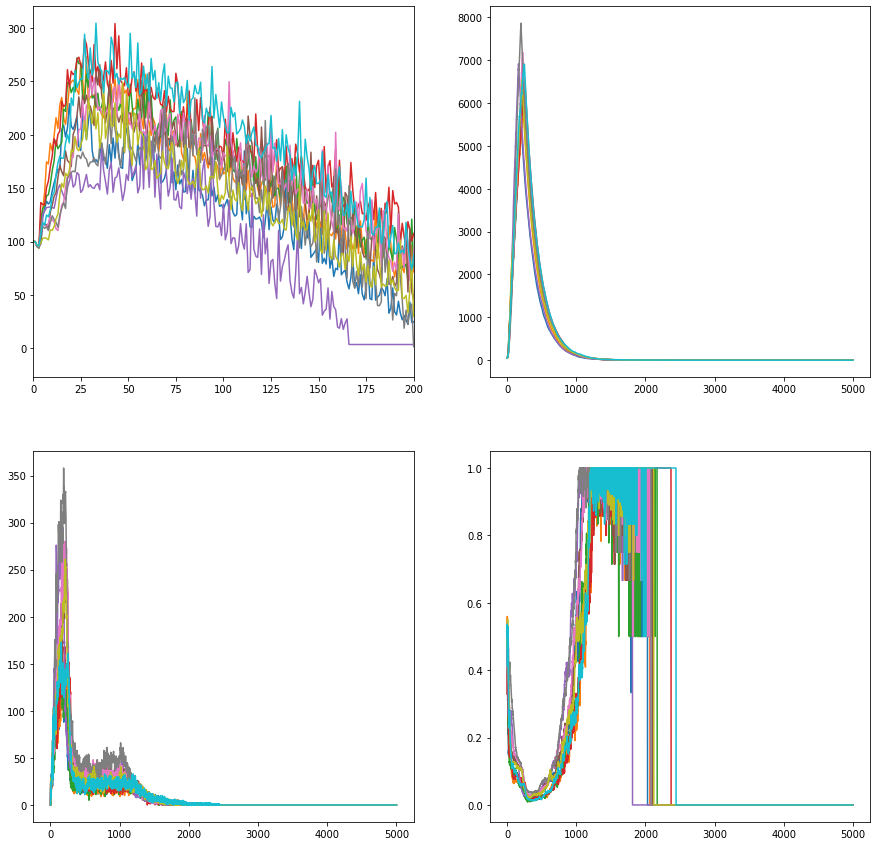

In [12]:
fig, axs = plt.subplots(2,2, figsize=(15,15))

time = [t for t in range(max_steps+1)]
for key in data.keys():
    df = data[key]
    axs[0,0].plot(time, df['Fungus Biomass'])
    axs[0,1].plot(time, df['Ant Biomass'])
    axs[1,0].plot(time, df['Ants with Leaves'])
    axs[1,1].plot(time, df['Fraction forager ants'])
    
#     axs[0,0].set_ylim(-10,10)
    axs[0,0].set_xlim(0,200)
    
plt.show